In [3]:
import pandas as pd

df = pd.read_excel("retail.xlsx")
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
#Q1. Basic Data Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("retail.xlsx")

# Total rows and columns
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# Missing values per column
print("\nMissing values:")
print(df.isnull().sum())

# Data types
print("\nData types:")
print(df.dtypes)


Rows: 525461
Columns: 8

Missing values:
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

Data types:
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object


In [7]:
#Q2. Time Period & Transactions
# Ensure InvoiceDate is datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Earliest and latest dates
earliest_date = df["InvoiceDate"].min()
latest_date = df["InvoiceDate"].max()

print("Earliest Purchase Date:", earliest_date)
print("Latest Purchase Date:", latest_date)

# Unique invoices
unique_invoices = df["Invoice"].nunique() #counts the number of unique (distinct) values in that column.
print("Total unique invoices:", unique_invoices)


Earliest Purchase Date: 2009-12-01 07:45:00
Latest Purchase Date: 2010-12-09 20:01:00
Total unique invoices: 28816


In [9]:
#Q3. Revenue Calculation
# Create TotalPrice column
df["TotalPrice"] = df["Quantity"] * df["Price"]

# Total revenue
total_revenue = df["TotalPrice"].sum()

# Average revenue per transaction
avg_revenue_per_txn = df.groupby("Invoice")["TotalPrice"].sum().mean()

print("Total Revenue:", total_revenue)
print("Average Revenue per Transaction:", avg_revenue_per_txn)


Total Revenue: 9539484.634
Average Revenue per Transaction: 331.0481896862854


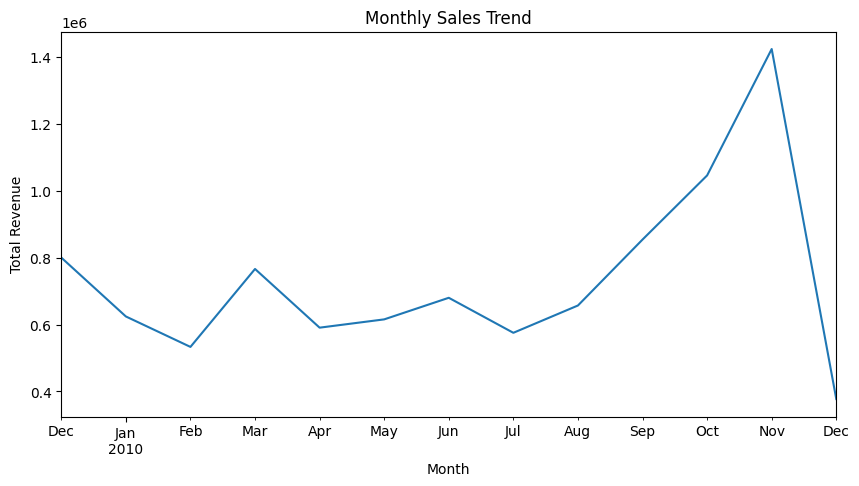

In [10]:
#Q4. Monthly Sales Trend
# Extract Year-Month
df["Month"] = df["InvoiceDate"].dt.to_period("M")
#.dt Pandas datetime accessor (used only with datetime columns).
#.to_period("M") Converts each date into a monthly period (YYYY-MM).

monthly_sales = df.groupby("Month")["TotalPrice"].sum()

# Plot
plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()


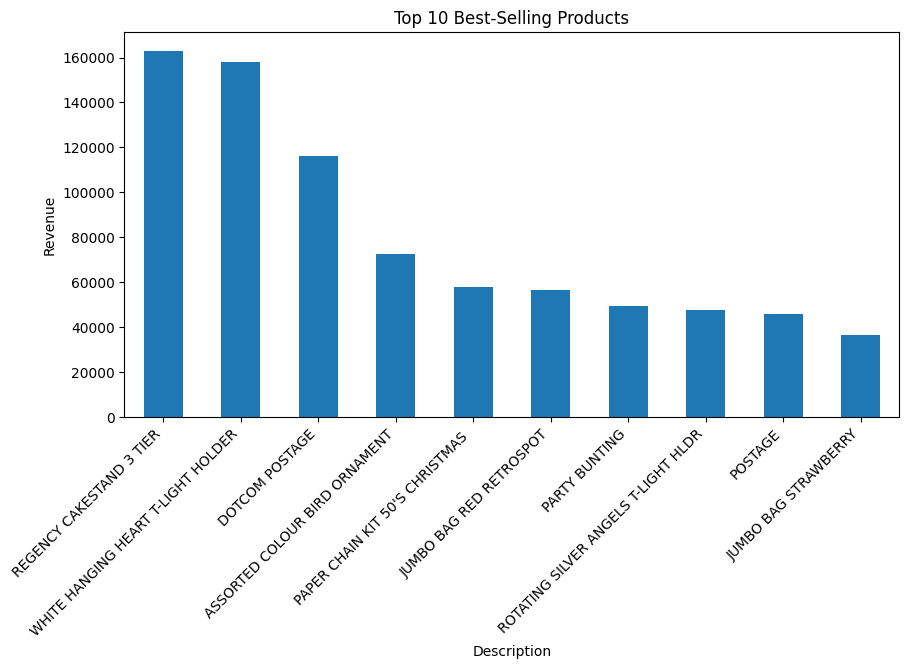

In [11]:
#Q5. Top 10 Best-Selling Products
top_products = (
    df.groupby("Description")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
top_products.plot(kind="bar")
plt.title("Top 10 Best-Selling Products")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.show()


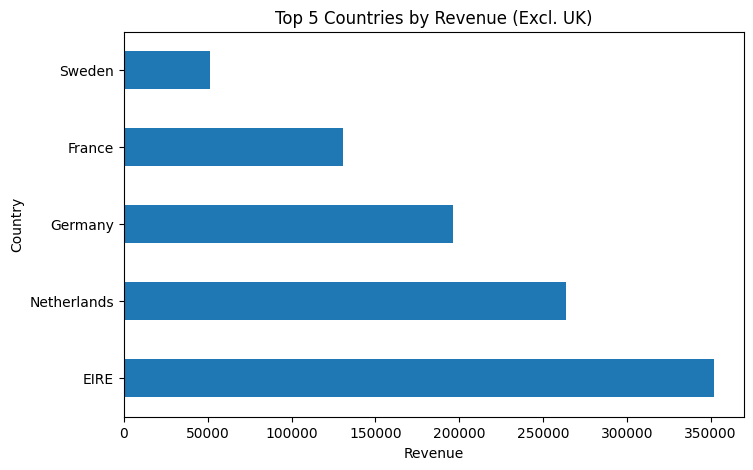

In [12]:
#Q6. Country-Wise Sales (Excluding UK)
country_sales = (
    df[df["Country"] != "United Kingdom"]
    .groupby("Country")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(8,5))
country_sales.plot(kind="barh")
plt.title("Top 5 Countries by Revenue (Excl. UK)")
plt.xlabel("Revenue")
plt.show()


In [15]:
#Q7. Customer Behavior Analysis
# Unique customers
unique_customers = df["Customer ID"].nunique()
print("Unique Customers:", unique_customers)

# Top 5 customers by spend
top_customers = (
    df.groupby("Customer ID")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print("\nTop 5 Customers by Purchase Amount:")
print(top_customers)

# Average spend per customer
avg_spend_customer = (
    df.groupby("Customer ID")["TotalPrice"].sum().mean()
)

print("\nAverage Spend per Customer:", avg_spend_customer)


Unique Customers: 4383

Top 5 Customers by Purchase Amount:
Customer ID
18102.0    341776.73
14646.0    243853.05
14156.0    183180.55
14911.0    137675.91
13694.0    128172.42
Name: TotalPrice, dtype: float64

Average Spend per Customer: 1904.679117955738


In [16]:
#Q8. Month-on-Month Growth Rate (NumPy)
monthly_df = monthly_sales.reset_index()
monthly_df["TotalPrice"] = monthly_df["TotalPrice"].astype(float)

# Percentage growth
monthly_df["MoM_Growth_%"] = (
    monthly_df["TotalPrice"].pct_change() * 100
)

print(monthly_df)


      Month   TotalPrice  MoM_Growth_%
0   2009-12   799847.110           NaN
1   2010-01   624032.892    -21.980978
2   2010-02   533091.426    -14.573185
3   2010-03   765848.761     43.661804
4   2010-04   590580.432    -22.885501
5   2010-05   615322.830      4.189505
6   2010-06   679786.610     10.476416
7   2010-07   575236.360    -15.379863
8   2010-08   656776.340     14.175039
9   2010-09   853650.431     29.975820
10  2010-10  1045168.350     22.435169
11  2010-11  1422654.642     36.117272
12  2010-12   377488.450    -73.465911


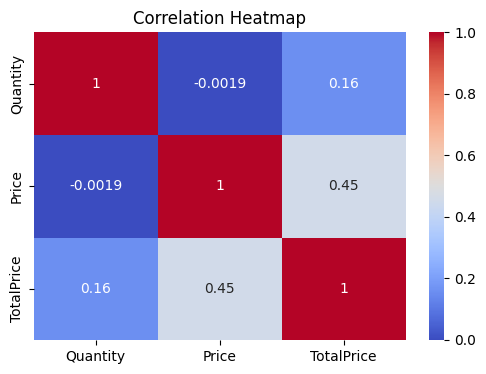

In [18]:
#Q9. Correlation Analysis
corr_matrix = df[["Quantity", "Price", "TotalPrice"]].corr()
#.corr() Computes the pairwise correlation coefficients between the columns

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [19]:
#Q10. Returns / Cancellations Detection
# Cancelled invoices start with 'C'
cancelled = df[df["Invoice"].astype(str).str.startswith("C")]

# Total cancelled invoices
total_cancelled_invoices = cancelled["Invoice"].nunique()

# Total revenue loss
total_loss = cancelled["TotalPrice"].sum()

print("Total Cancelled Invoices:", total_cancelled_invoices)
print("Total Value Lost due to Cancellations:", total_loss)


Total Cancelled Invoices: 4592
Total Value Lost due to Cancellations: -629855.37
